In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import itertools
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import helper
%matplotlib inline


In [2]:
# Import the Movies dataset
movies = pd.read_csv('data/Q1/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
# Import the ratings dataset
ratings = pd.read_csv('data/Q1/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
# Print the number of records and the total number of movies
print('The dataset contains: ', len(ratings), ' ratings of ', len(movies), ' movies.')
    

The dataset contains:  100836  ratings of  9742  movies.


In [5]:
#Mvoiew level clustering 

In [6]:
# Merge the two tables then pivot so we have Users X Movies dataframe
ratings_title = pd.merge(ratings, movies[['movieId', 'title']], on='movieId' )
user_movie_ratings = pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')
print('dataset dimensions: ', user_movie_ratings.shape, '\n\nSubset example:')
user_movie_ratings.iloc[:6, :10]

dataset dimensions:  (610, 9719) 

Subset example:


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987)
userId,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
n_movies = 30
n_users = 18
most_rated_movies_users_selection = helper.sort_by_rating_density(user_movie_ratings, n_movies, n_users)

print('dataset dimensions: ', most_rated_movies_users_selection.shape)
most_rated_movies_users_selection.head()

dataset dimensions:  (18, 30)


title,Forrest Gump (1994),"Shawshank Redemption, The (1994)",Pulp Fiction (1994),"Silence of the Lambs, The (1991)","Matrix, The (1999)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),Braveheart (1995),Terminator 2: Judgment Day (1991),Schindler's List (1993),...,Star Wars: Episode VI - Return of the Jedi (1983),"Godfather, The (1972)","Fugitive, The (1993)",Batman (1989),Saving Private Ryan (1998),"Lord of the Rings: The Two Towers, The (2002)","Lord of the Rings: The Return of the King, The (2003)",Aladdin (1992),Fargo (1996),"Sixth Sense, The (1999)"
413,5.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,4.0,...,5.0,5.0,5.0,4.0,5.0,5.0,4.0,4.0,5.0,3.0
589,5.0,4.5,4.5,3.5,4.0,5.0,4.0,4.0,4.5,5.0,...,4.5,5.0,4.0,3.5,4.0,5.0,4.5,4.0,4.0,3.5
473,3.0,5.0,4.0,4.5,4.5,4.0,4.5,3.0,4.0,5.0,...,4.0,5.0,5.0,4.0,3.0,5.0,5.0,4.0,4.0,5.0
479,5.0,5.0,4.0,4.5,5.0,4.5,5.0,5.0,4.5,5.0,...,3.5,5.0,3.5,4.5,4.5,4.5,4.0,4.0,4.0,4.0
67,3.5,3.0,2.0,3.5,4.5,5.0,3.5,2.5,3.5,4.0,...,5.0,4.0,4.5,4.0,4.0,4.0,4.5,3.5,2.5,2.5


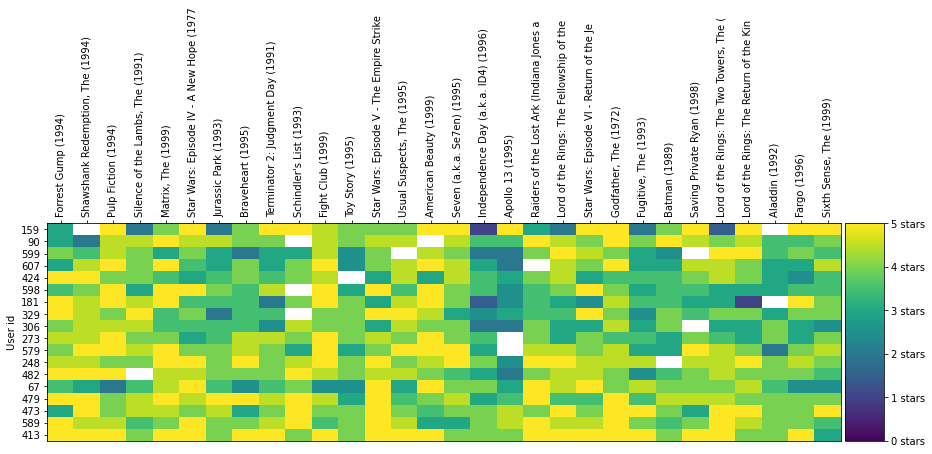

In [8]:
helper.draw_movies_heatmap(most_rated_movies_users_selection)

In [9]:
user_movie_ratings =  pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')
most_rated_movies_1k = helper.get_most_rated_movies(user_movie_ratings, 9719)
#most_rated_movies_1k = helper.get_most_rated_movies(user_movie_ratings, 5000)
#most_rated_movies_1k = helper.get_most_rated_movies(user_movie_ratings, 193609)
#most_rated_movies_1k = helper.get_most_rated_movies(user_movie_ratings, 50000)
print(user_movie_ratings.shape)
print(most_rated_movies_1k.shape)

(610, 9719)
(610, 9719)


In [10]:
#sparse_ratings = csr_matrix(pd.SparseDataFrame(most_rated_movies_1k).to_coo())
#most_rated_movies_1k.fillna(0)
sp_arr = csr_matrix(most_rated_movies_1k.fillna(0))
sdf = pd.DataFrame.sparse.from_spmatrix(sp_arr)
sparse_ratings = sdf.sparse.to_coo()

In [11]:
# 20 clusters
#predictions = KMeans(n_clusters=20, algorithm='full').fit_predict(sparse_ratings)
predictions = KMeans(n_clusters=5, algorithm='full').fit_predict(sparse_ratings)

max_users = 70
max_movies = 50

clustered = pd.concat([most_rated_movies_1k.reset_index(), pd.DataFrame({'group':predictions})], axis=1)

C:\Users\User\Documents\GitHub\420_A1\Assignment 1C\Problem_1\helper.py:202: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  heatmap = ax.imshow(most_rated_movies_users_selection,  interpolation='nearest', vmin=0, vmax=5, aspect='auto')


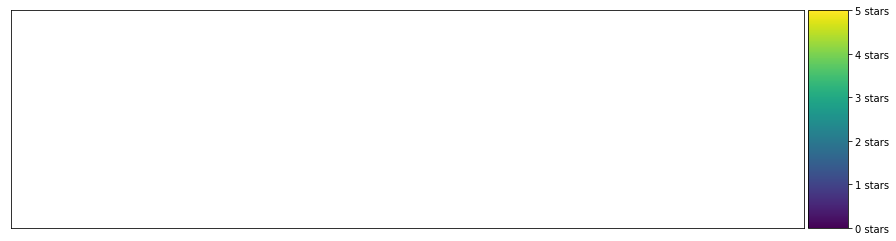

In [12]:
# TODO: Pick a cluster ID from the clusters above
cluster_number = 5

# Let's filter to only see the region of the dataset with the most number of values 
n_users = 75
n_movies = 300
cluster = clustered[clustered.group == cluster_number].drop(['index', 'group'], axis=1)

cluster = helper.sort_by_rating_density(cluster, n_movies, n_users)
helper.draw_movies_heatmap(cluster, axis_labels=False)



In [13]:
#cluster = clustered[clustered.group == 5].drop(['index', 'group'], axis=1)
#cluster = helper.sort_by_rating_density(cluster, n_movies, n_users)
#helper.draw_movies_heatmap(cluster, axis_labels=False)

In [14]:
cluster.fillna('').head()

,Forrest Gump (1994),Tomboy (2011),Tom and Jerry: A Nutcracker Tale (2007),Them (Ils) (2006),The Unauthorized Saved by the Bell Story (2014),The Voices (2014),The Void (2016),The Wailing (2016),The Wait (2015),The Wild One (1953),...,Three from Prostokvashino (1978),"Thrill of It All, The (1963)",Through a Glass Darkly (Såsom i en spegel) (1961),Unthinkable (2010),Upside Down (2012),"Secret Policeman's Other Ball, The (1982)",With Great Power: The Stan Lee Story (2012),Winnie the Pooh and Tigger Too (1974),Winnie the Pooh and the Day of Concern (1972),Winnie the Pooh and the Honey Tree (1966)


In [15]:
# TODO: Fill in the name of the column/movie. e.g. 'Forrest Gump (1994)'
# Pick a movie from the table above since we're looking at a subset
#movie_name = 'Apollo 13 (1995)'

#cluster[movie_name].mean()

In [16]:
# The average rating of 20 movies as rated by the users in the cluster
cluster.mean().head(20)

Forrest Gump (1994)                               NaN
Tomboy (2011)                                     NaN
Tom and Jerry: A Nutcracker Tale (2007)           NaN
Them (Ils) (2006)                                 NaN
The Unauthorized Saved by the Bell Story (2014)   NaN
The Voices (2014)                                 NaN
The Void (2016)                                   NaN
The Wailing (2016)                                NaN
The Wait (2015)                                   NaN
The Wild One (1953)                               NaN
The Witch (2015)                                  NaN
The Wolfpack (2015)                               NaN
The Wooden Horse (1950)                           NaN
The Year My Voice Broke (1987)                    NaN
Themroc (1973)                                    NaN
The Town that Dreaded Sundown (2014)              NaN
There Once Was a Dog (1982)                       NaN
Tom and Jerry: Shiver Me Whiskers (2006)          NaN
Ultimate Avengers 2 (2006)  

In [17]:
cluster.fillna('').head()

,Forrest Gump (1994),Tomboy (2011),Tom and Jerry: A Nutcracker Tale (2007),Them (Ils) (2006),The Unauthorized Saved by the Bell Story (2014),The Voices (2014),The Void (2016),The Wailing (2016),The Wait (2015),The Wild One (1953),...,Three from Prostokvashino (1978),"Thrill of It All, The (1963)",Through a Glass Darkly (Såsom i en spegel) (1961),Unthinkable (2010),Upside Down (2012),"Secret Policeman's Other Ball, The (1982)",With Great Power: The Stan Lee Story (2012),Winnie the Pooh and Tigger Too (1974),Winnie the Pooh and the Day of Concern (1972),Winnie the Pooh and the Honey Tree (1966)


In [18]:
#user_id = 2

# Get all this user's ratings
#user_2_ratings  = cluster.loc[user_id, :]
#user_2_ratings

In [19]:

# TODO: Pick a user ID from the dataset
# Look at the table above outputted by the command "cluster.fillna('').head()" 
# and pick one of the user ids (the first column in the table)
#user_id = 4

# Get all this user's ratings
#user_2_ratings  = cluster.loc[user_id, :]

# Which movies did they not rate? (We don't want to recommend movies they've already rated)
#user_2_unrated_movies =  user_2_ratings[user_2_ratings.isnull()]

# What are the ratings of these movies the user did not rate?
#avg_ratings = pd.concat([user_2_unrated_movies, cluster.mean()], axis=1, join='inner').loc[:,0]

# Let's sort by rating so the highest rated movies are presented first
#avg_ratings.sort_values(ascending=False)[:20]

In [20]:
# https://github.com/gouravaich/k-means-clustering-movie-ratings/blob/master/k-means%20Clustering%20of%20Movie%20Ratings.ipynb

In [21]:
#print(len(avg_ratings.sort_values(ascending=False)))

In [22]:
#testing 

In [23]:
#predictions 3 
# Pick a cluster ID from the clusters above
#from random import randrange
#cluster_number = randrange(10)
# Let's filter to only see the region of the dataset with the most number of values 
#n_users = 75
#n_movies = 300
#cluster = clustered[clustered.group == cluster_number].drop(['index', 'group'], axis=1)
# Sort and print the cluster
#cluster = helper.sort_by_rating_density(cluster, n_movies, n_users)
#helper.draw_movies_heatmap(cluster, axis_labels=False)

In [24]:
#print(cluster_number)

In [25]:
# Print the ratings
#cluster.fillna('').head()

In [26]:
#movie_name = "Matrix, The (1999)"
#cluster[movie_name].mean()

In [27]:
# Pick a user ID from the dataset
#user_id = 4
# Get all this user's ratings
#user_2_ratings  = cluster.loc[user_id, :]
# Which movies did they not rate? 
#user_2_unrated_movies =  user_2_ratings[user_2_ratings.isnull()]
# What are the ratings of these movies the user did not rate?
#avg_ratings = pd.concat([user_2_unrated_movies, cluster.mean()], axis=1, join='inner').loc[:,0]
# Let's sort by rating so the highest rated movies are presented first
#avg_ratings.sort_values(ascending=False)[:20]

In [28]:
# Pick a user ID from the dataset
#user_id = 42
# Get all this user's ratings
#user_2_ratings  = cluster.loc[user_id, :]
# Which movies did they not rate? 
#user_2_unrated_movies =  user_2_ratings[user_2_ratings.isnull()]
# What are the ratings of these movies the user did not rate?
#avg_ratings = pd.concat([user_2_unrated_movies, cluster.mean()], axis=1, join='inner').loc[:,0]
# Let's sort by rating so the highest rated movies are presented first
#avg_ratings.sort_values(ascending=False)[:20]

In [29]:
# Pick a user ID from the dataset
#user_id = 314
# Get all this user's ratings
#user_2_ratings  = cluster.loc[user_id, :]
# Which movies did they not rate? 
#user_2_unrated_movies =  user_2_ratings[user_2_ratings.isnull()]
# What are the ratings of these movies the user did not rate?
#avg_ratings = pd.concat([user_2_unrated_movies, cluster.mean()], axis=1, join='inner').loc[:,0]
# Let's sort by rating so the highest rated movies are presented first
#avg_ratings.sort_values(ascending=False)[:20]

C:\Users\User\Documents\GitHub\420_A1\Assignment 1C\Problem_1\helper.py:202: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  heatmap = ax.imshow(most_rated_movies_users_selection,  interpolation='nearest', vmin=0, vmax=5, aspect='auto')


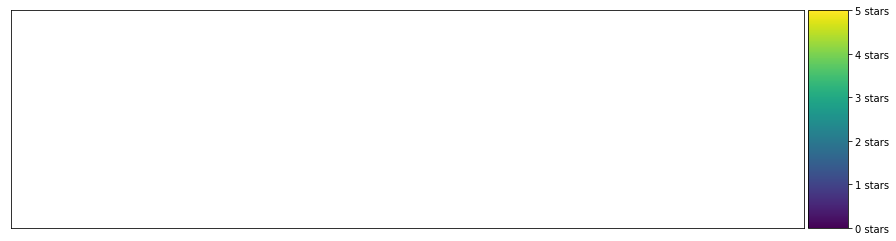

5
_________
An exception occurred


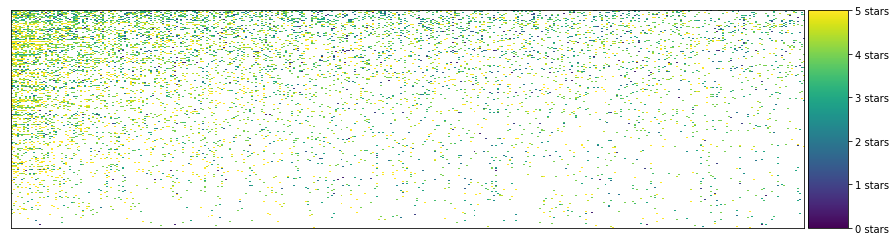

1
_________
Shawshank Redemption, The (1994)                                               4.445122
Cool Hand Luke (1967)                                                          4.380000
North by Northwest (1959)                                                      4.370370
Rear Window (1954)                                                             4.317073
Casablanca (1942)                                                              4.295918
Departed, The (2006)                                                           4.294643
Godfather: Part II, The (1974)                                                 4.269231
Chinatown (1974)                                                               4.258621
One Flew Over the Cuckoo's Nest (1975)                                         4.256579
Dark Knight, The (2008)                                                        4.255319
Green Mile, The (1999)                                                         4.254717
American History X (

In [30]:
from random import randrange
while True: 
    try:
    #predictions testing
        # Pick random cluster ID from the clusters above
        cluster_number = randrange(6)
        #cluster_number = 12
        # Let's filter to only see the region of the dataset with the most number of values 
        n_users = 400
        n_movies = 400
        cluster = clustered[clustered.group == cluster_number].drop(['index', 'group'], axis=1)
        # Sort and print the cluster
        cluster = helper.sort_by_rating_density(cluster, n_movies, n_users)
        helper.draw_movies_heatmap(cluster, axis_labels=False)
        print(cluster_number)
        print("_________")

        # Pick a user ID from the dataset
        user_id = 4
        # Get all this user's ratings
        user_2_ratings  = cluster.loc[user_id, :]
        # Which movies did they not rate? 
        user_2_unrated_movies =  user_2_ratings[user_2_ratings.isnull()]
        # What are the ratings of these movies the user did not rate?
        avg_ratings = pd.concat([user_2_unrated_movies, cluster.mean()], axis=1, join='inner').loc[:,0]
        # Let's sort by rating so the highest rated movies are presented first
        User_4_sugest = avg_ratings.sort_values(ascending=False)
        print(User_4_sugest[:20])
        break
    except:
        print("An exception occurred")

C:\Users\User\Documents\GitHub\420_A1\Assignment 1C\Problem_1\helper.py:202: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  heatmap = ax.imshow(most_rated_movies_users_selection,  interpolation='nearest', vmin=0, vmax=5, aspect='auto')


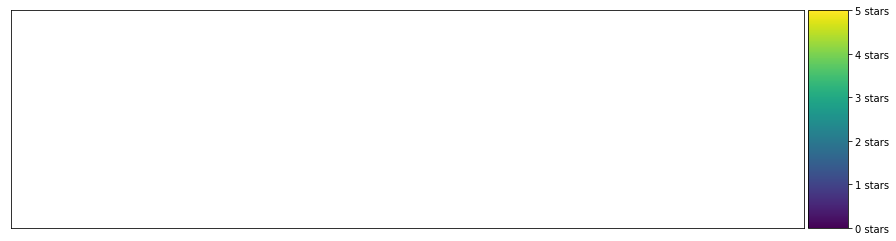

5
_________
An exception occurred


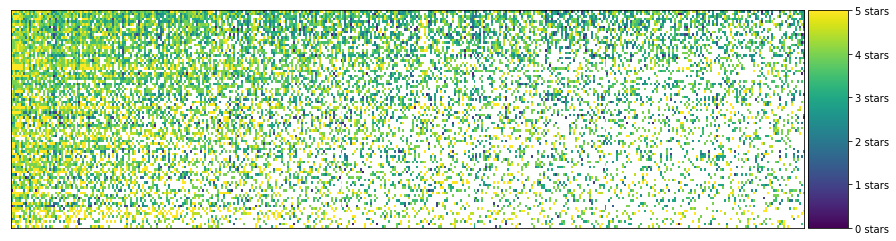

0
_________
Platoon (1986)                                          4.333333
Schindler's List (1993)                                 4.326923
Spirited Away (Sen to Chihiro no kamikakushi) (2001)    4.303571
Life Is Beautiful (La Vita è bella) (1997)              4.290323
Office Space (1999)                                     4.276596
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)    4.237500
Departed, The (2006)                                    4.230769
Rear Window (1954)                                      4.209677
Shaun of the Dead (2004)                                4.202703
One Flew Over the Cuckoo's Nest (1975)                  4.197674
28 Days Later (2002)                                    4.187500
American History X (1998)                               4.180851
Eternal Sunshine of the Spotless Mind (2004)            4.174419
Forrest Gump (1994)                                     4.173077
Run Lola Run (Lola rennt) (1998)                        4.171875
Snatch (2000)

In [31]:
while True: 
    try:
    #predictions testing
        # Pick a cluster ID from the clusters above
        cluster_number = randrange(6)
        #cluster_number = 12
        # Let's filter to only see the region of the dataset with the most number of values 
        n_users = 400
        n_movies = 400
        cluster = clustered[clustered.group == cluster_number].drop(['index', 'group'], axis=1)
        # Sort and print the cluster
        cluster = helper.sort_by_rating_density(cluster, n_movies, n_users)
        helper.draw_movies_heatmap(cluster, axis_labels=False)
        print(cluster_number)
        print("_________")

        # Pick a user ID from the dataset
        user_id = 42
        # Get all this user's ratings
        user_2_ratings  = cluster.loc[user_id, :]
        # Which movies did they not rate? 
        user_2_unrated_movies =  user_2_ratings[user_2_ratings.isnull()]
        # What are the ratings of these movies the user did not rate?
        avg_ratings = pd.concat([user_2_unrated_movies, cluster.mean()], axis=1, join='inner').loc[:,0]        
        # Let's sort by rating so the highest rated movies are presented first
        User_42_sugest = avg_ratings.sort_values(ascending=False)
        print(User_42_sugest[:20])
        break
    except:
        print("An exception occurred")

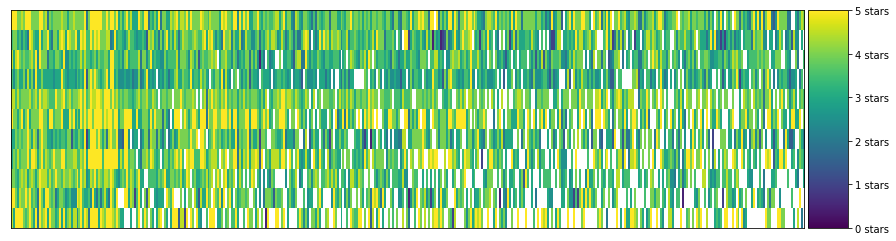

3
_________
An exception occurred


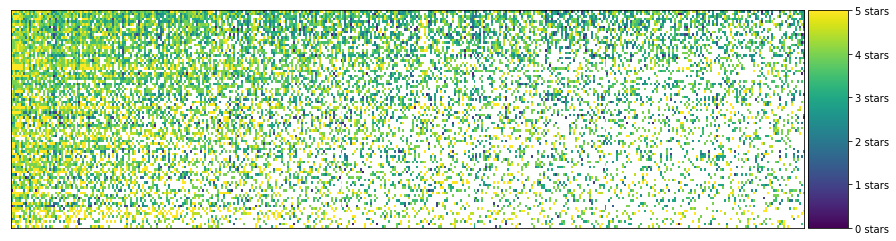

0
_________
An exception occurred


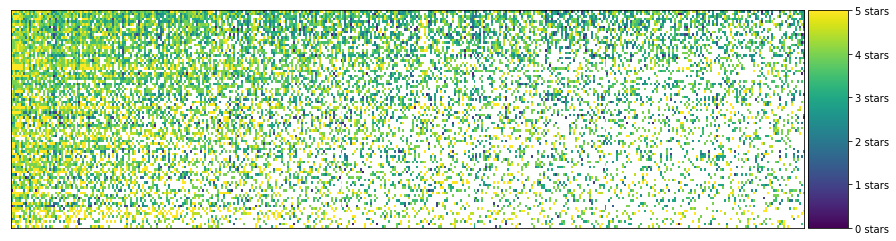

0
_________
An exception occurred


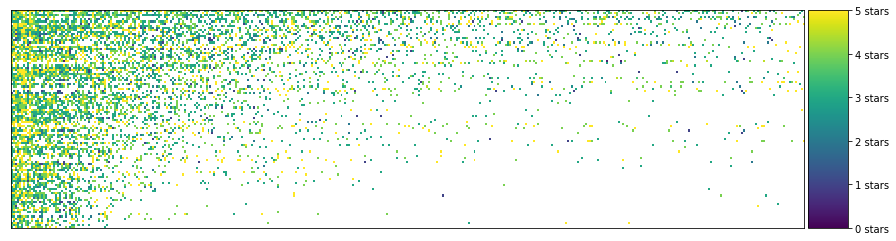

4
_________
An exception occurred


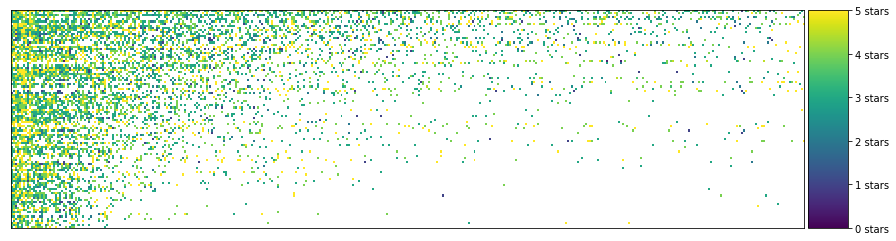

4
_________
An exception occurred


C:\Users\User\Documents\GitHub\420_A1\Assignment 1C\Problem_1\helper.py:202: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  heatmap = ax.imshow(most_rated_movies_users_selection,  interpolation='nearest', vmin=0, vmax=5, aspect='auto')


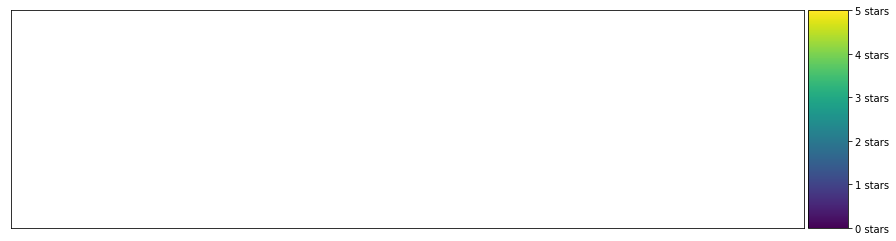

5
_________
An exception occurred


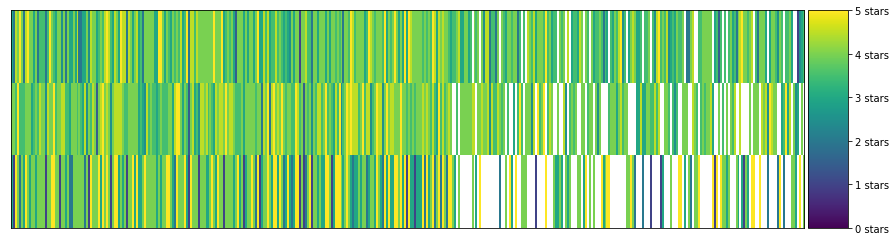

2
_________
An exception occurred


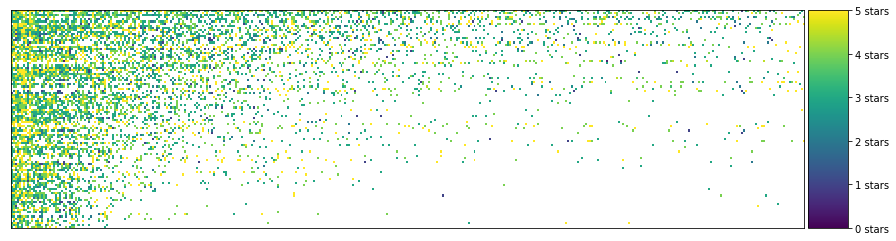

4
_________
An exception occurred


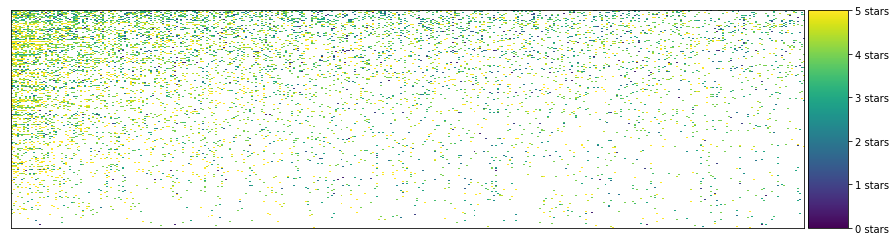

1
_________
Cool Hand Luke (1967)                                                          4.380000
North by Northwest (1959)                                                      4.370370
Rear Window (1954)                                                             4.317073
Casablanca (1942)                                                              4.295918
Departed, The (2006)                                                           4.294643
Godfather: Part II, The (1974)                                                 4.269231
Chinatown (1974)                                                               4.258621
One Flew Over the Cuckoo's Nest (1975)                                         4.256579
Green Mile, The (1999)                                                         4.254717
American History X (1998)                                                      4.250000
Pulp Fiction (1994)                                                            4.244526
Taxi Driver (1976)  

In [32]:
i = 0 
while True: 
    try:
    #predictions testing
        # Pick a cluster ID from the clusters above
        cluster_number = randrange(6)
        #cluster_number = i
        #cluster_number = 12
        # Let's filter to only see the region of the dataset with the most number of values 
        n_users = 400
        n_movies = 400
        cluster = clustered[clustered.group == cluster_number].drop(['index', 'group'], axis=1)
        # Sort and print the cluster
        cluster = helper.sort_by_rating_density(cluster, n_movies, n_users)
        helper.draw_movies_heatmap(cluster, axis_labels=False)
        print(cluster_number)
        print("_________")

        # Pick a user ID from the dataset
        user_id = 314
        # Get all this user's ratings
        user_2_ratings  = cluster.loc[user_id, :]
        # Which movies did they not rate? 
        user_2_unrated_movies =  user_2_ratings[user_2_ratings.isnull()]
        # What are the ratings of these movies the user did not rate?
        avg_ratings = pd.concat([user_2_unrated_movies, cluster.mean()], axis=1, join='inner').loc[:,0]
        # Let's sort by rating so the highest rated movies are presented first
        User_314_sugest = avg_ratings.sort_values(ascending=False)
        print(User_314_sugest[:20])
        break
    except:
        print("An exception occurred")
    i = i+1

Text(0, 0.5, 'Distortion')

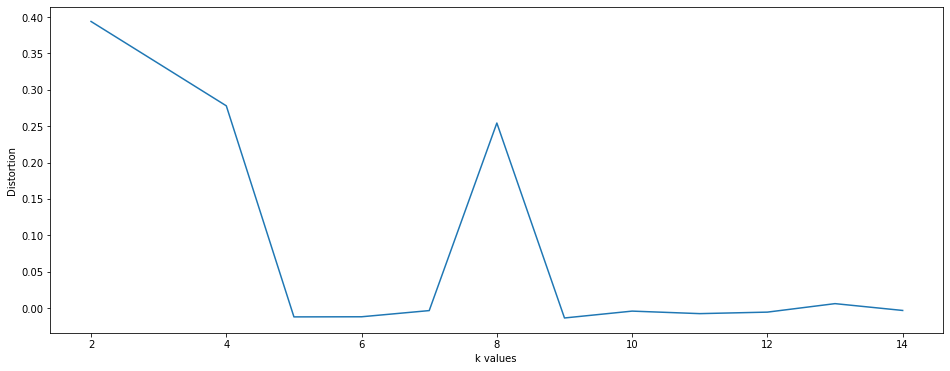

In [33]:


# Calculate error values for all k values we're interested in
#possible_k_values = range(2, 100)
possible_k_values = range(2, 15)
errors_per_k = [helper.clustering_errors(k, sparse_ratings) for k in possible_k_values]
#uses silhouette_score 
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(possible_k_values, errors_per_k)
plt.xlabel('k values ')
plt.ylabel('Distortion')

In [34]:
# Calculate error values for all k values we're interested in
#possible_k_values = range(2, 100)
#possible_k_values = range(2, 30)
#errors_per_k = [helper.clustering_errors(k, sparse_ratings) for k in possible_k_values]
#uses silhouette_score 
#fig, ax = plt.subplots(figsize=(16, 6))
#plt.plot(possible_k_values, errors_per_k)
#plt.xlabel('k values ')
#plt.ylabel('Distortion')

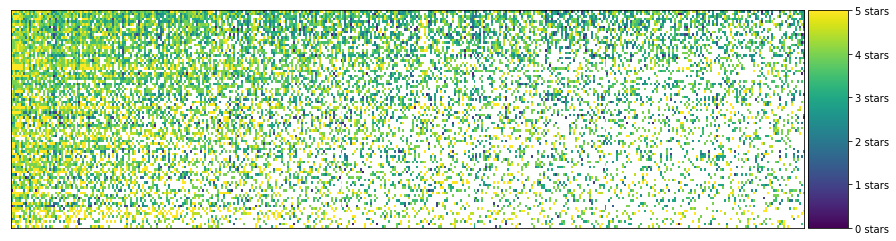

0
_________


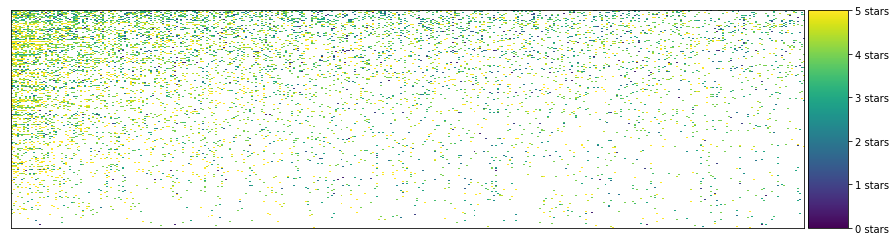

1
_________


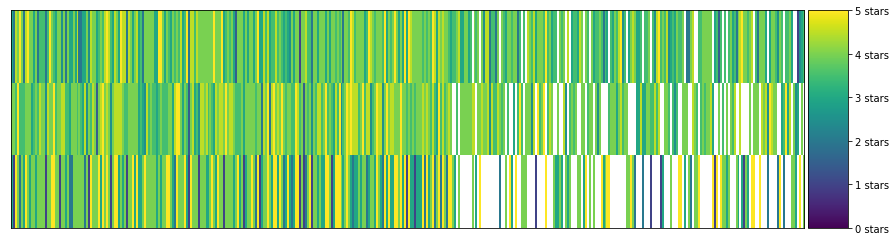

2
_________


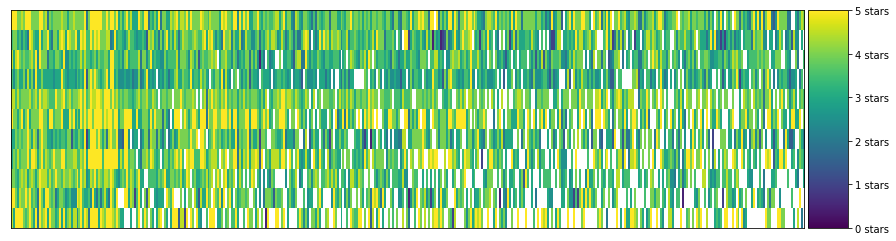

3
_________


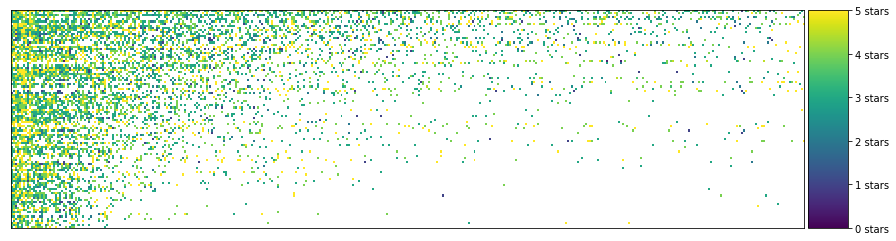

4
_________


C:\Users\User\Documents\GitHub\420_A1\Assignment 1C\Problem_1\helper.py:202: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  heatmap = ax.imshow(most_rated_movies_users_selection,  interpolation='nearest', vmin=0, vmax=5, aspect='auto')


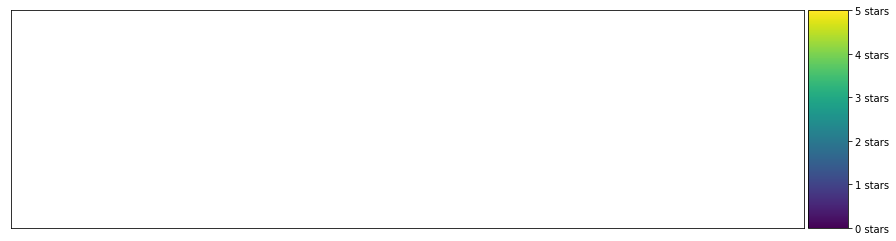

5
_________


C:\Users\User\Documents\GitHub\420_A1\Assignment 1C\Problem_1\helper.py:202: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  heatmap = ax.imshow(most_rated_movies_users_selection,  interpolation='nearest', vmin=0, vmax=5, aspect='auto')


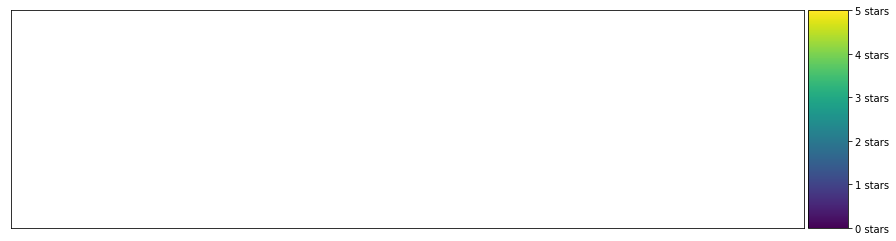

6
_________


In [35]:
i = 0 
while i<7: 
    try:
    #predictions testing
        # Pick a cluster ID from the clusters above
        cluster_number = i
        #cluster_number = i
        #cluster_number = 12
        # Let's filter to only see the region of the dataset with the most number of values 
        n_users = 400
        n_movies = 400
        cluster = clustered[clustered.group == cluster_number].drop(['index', 'group'], axis=1)
        # Sort and print the cluster
        cluster = helper.sort_by_rating_density(cluster, n_movies, n_users)
        helper.draw_movies_heatmap(cluster, axis_labels=False)
        print(cluster_number)
        print("_________")
    except:
        print("An exception occurred")
    i = i+1

In [36]:
##user 4 most type of viewed movie 

In [37]:
ratings_title = pd.merge(ratings, movies[['movieId', 'title','genres']], on='movieId' )

ratings_title = ratings_title[ratings_title['userId'] == 4]

#ratings_title.sort_values(by=['rating'], ascending=False).head()
ratings_title = ratings_title[ratings_title['rating'] > 3]
#
#ratings_title.head()
ratings_title['genres'].value_counts()

Drama                                      15
Comedy                                     13
Comedy|Drama                               10
Drama|Romance                               6
Comedy|Drama|Romance                        6
                                           ..
Crime|Drama|Film-Noir                       1
Action|Adventure|Drama|Thriller|Western     1
Animation|Children|Comedy|Musical           1
Western                                     1
Adventure|Fantasy|Musical                   1
Name: genres, Length: 65, dtype: int64

In [38]:
#User_4_sugest = pd.merge(User_4_sugest, movies[['genres']], on='movieId' )
#User_4_sugest['genres'].value_counts()

print(User_4_sugest[:10])

Shawshank Redemption, The (1994)          4.445122
Cool Hand Luke (1967)                     4.380000
North by Northwest (1959)                 4.370370
Rear Window (1954)                        4.317073
Casablanca (1942)                         4.295918
Departed, The (2006)                      4.294643
Godfather: Part II, The (1974)            4.269231
Chinatown (1974)                          4.258621
One Flew Over the Cuckoo's Nest (1975)    4.256579
Dark Knight, The (2008)                   4.255319
Name: 0, dtype: float64


In [39]:
#ecommendations = movies[movies['title'] == 'Chinatown (1974)' 
#                         or 'Citizen Kane (1941)' 
#                         or 'Lawrence of Arabia (1962)'
#                         or 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)'
#                         or 'CShawshank Redemption, The (1994)']


recom = movies[movies['title'].isin(['Raging Bull (1980)',
                                     'Lawrence of Arabia (1962)',
                                     'It\'s a Wonderful Life (1946)',
                                     'Shawshank Redemption, The (1994)',
                                     'Office Space (1999)' ])]
recom                    
                           

,movieId,title,genres
277,318,"Shawshank Redemption, The (1994)",Crime|Drama
733,953,It's a Wonderful Life (1946),Children|Drama|Fantasy|Romance
906,1204,Lawrence of Arabia (1962),Adventure|Drama|War
929,1228,Raging Bull (1980),Drama
1883,2502,Office Space (1999),Comedy|Crime


In [40]:
ratings_title = pd.merge(ratings, movies[['movieId', 'title','genres']], on='movieId' )

ratings_title = ratings_title[ratings_title['userId'] == 42]

#ratings_title.sort_values(by=['rating'], ascending=False).head()
ratings_title = ratings_title[ratings_title['rating'] > 3]
#
#ratings_title.head()
ratings_title['genres'].value_counts()

Comedy                       33
Drama                        22
Comedy|Romance               18
Action|Adventure|Thriller     9
Drama|Romance                 9
                             ..
Drama|Romance|Thriller        1
Drama|Fantasy|Thriller        1
Comedy|Drama|War              1
Romance                       1
Action|Drama|Western          1
Name: genres, Length: 98, dtype: int64

In [41]:
print(User_42_sugest[:10])


Platoon (1986)                                          4.333333
Schindler's List (1993)                                 4.326923
Spirited Away (Sen to Chihiro no kamikakushi) (2001)    4.303571
Life Is Beautiful (La Vita è bella) (1997)              4.290323
Office Space (1999)                                     4.276596
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)    4.237500
Departed, The (2006)                                    4.230769
Rear Window (1954)                                      4.209677
Shaun of the Dead (2004)                                4.202703
One Flew Over the Cuckoo's Nest (1975)                  4.197674
Name: 0, dtype: float64


In [42]:
recom = movies[movies['title'].isin(['Glory (1989)',
                                     'Star Wars: Episode IV - A New Hope (1977)',
                                     'Patton (1970)',
                                     'Wizard of Oz, The (1939)',
                                     'Titanic (1997)' ])]
recom       

,movieId,title,genres
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
701,919,"Wizard of Oz, The (1939)",Adventure|Children|Fantasy|Musical
941,1242,Glory (1989),Drama|War
971,1272,Patton (1970),Drama|War
1291,1721,Titanic (1997),Drama|Romance


In [43]:
ratings_title = pd.merge(ratings, movies[['movieId', 'title','genres']], on='movieId' )

ratings_title = ratings_title[ratings_title['userId'] == 314]

#ratings_title.sort_values(by=['rating'], ascending=False).head()
ratings_title = ratings_title[ratings_title['rating'] > 3]
#
#ratings_title.head()
ratings_title['genres'].value_counts()

Comedy|Romance                                     5
Drama                                              4
Comedy|Drama|Romance                               2
Comedy|Fantasy|Romance                             1
Drama|Horror|Sci-Fi                                1
Comedy|Drama|Romance|War                           1
Action|Thriller                                    1
Action|Drama|War                                   1
Comedy                                             1
Adventure|Drama|Sci-Fi                             1
Children|Drama|Fantasy|Mystery                     1
Drama|War                                          1
Drama|Romance                                      1
Action|Adventure|Thriller                          1
Crime|Mystery|Thriller                             1
Action|Adventure|Sci-Fi                            1
Crime|Drama                                        1
Action|Sci-Fi                                      1
Comedy|Drama|Fantasy|Romance|Thriller         

In [44]:
print(User_314_sugest[:10])

Cool Hand Luke (1967)                     4.380000
North by Northwest (1959)                 4.370370
Rear Window (1954)                        4.317073
Casablanca (1942)                         4.295918
Departed, The (2006)                      4.294643
Godfather: Part II, The (1974)            4.269231
Chinatown (1974)                          4.258621
One Flew Over the Cuckoo's Nest (1975)    4.256579
Green Mile, The (1999)                    4.254717
American History X (1998)                 4.250000
Name: 0, dtype: float64


In [45]:
recom = movies[movies['title'].isin(['Cool Hand Luke (1967)',
                                     'Shawshank Redemption, The (1994)',
                                     'Lock, Stock & Two Smoking Barrels (1998)',
                                     'North by Northwest (1959)',
                                     'Rear Window (1954)' ])]
recom       

,movieId,title,genres
277,318,"Shawshank Redemption, The (1994)",Crime|Drama
686,904,Rear Window (1954),Mystery|Thriller
690,908,North by Northwest (1959),Action|Adventure|Mystery|Romance|Thriller
975,1276,Cool Hand Luke (1967),Drama
1917,2542,"Lock, Stock & Two Smoking Barrels (1998)",Comedy|Crime|Thriller
